# Sci-Kit Learn Titanic Classification
Tony Nguyen

CPSC 222 01

12/7/2022

Data Assignment 7

I attempted the bonus

### Data Loading
For this assigtnment, I will work with the *Titanic survival dataset*, which contains information about passengers of the infamous accident in 1912. 

The attrbutes of this dataset include:

Variable|Definition|Key
--------|----------|---
Survived|Survival|0 = No, 1 = Yes
Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
Sex|Sex
Age|Age in years
SibSp|# of siblings / spouses aboard the Titanic
Parch|# of parents / children aboard the Titanic
Ticket|Ticket number
Fare|Passenger fare
Cabin|Cabin number
Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

In [62]:
import pandas as pd
df = pd.read_csv("titanic.csv", index_col=0)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Data Cleaning
I remove the following attributes:
* `Name`: Since each passenger is already assigned an ID, their names are not needed anymore
* `Ticket`: This attrbute represents ticket numbers, which is unique to each passenger
* `Cabin`: This attribute is redundant as we have `Pclass` (which ticket class one is in) already

With rows that have a missing value, I remove them as well.

In [63]:
df = df.drop(["Name", "Ticket", "Cabin"], axis=1)
df.dropna(inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,3,female,39.0,0,5,29.1250,Q
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S


For every categorical features, in this case, `Sex` and `Embarked` attribute, I encode them with a number.
* `Sex`: 0 = "female" and 1 = "male"
* `Embarked`: 0 = "C", 1 = "Q", 2 = "S" 

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for item in df.columns:
    if item == "Sex" or item == "Embarked":
        le.fit(df[item])
        df[item] = le.transform(df[item])

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,3,0,39.0,0,5,29.1250,1
887,0,2,1,27.0,0,0,13.0000,2
888,1,1,0,19.0,0,0,30.0000,2


### Exploratory Data Analysis
As one of the facts that made the Titanic incident to be so tragic was the great loss of life. With that, I think it will be helpful for the analysis purpose to investigate the difference between the survived group and the deceased group

In [66]:
grouped_by_survival = df.groupby("Survived")
survived = grouped_by_survival.get_group(1)
survived

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
9,1,3,0,27.0,0,2,11.1333,2
10,1,2,0,14.0,1,0,30.0708,0
...,...,...,...,...,...,...,...,...
876,1,3,0,15.0,0,0,7.2250,0
880,1,1,0,56.0,0,1,83.1583,0
881,1,2,0,25.0,0,1,26.0000,2


In [67]:
survived.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,288.0,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,1.0,1.878472,0.322917,28.193299,0.496528,0.531250,51.647672,1.423611
std,0.0,0.836340,0.468405,14.859146,0.732512,0.808747,70.664499,0.891929
min,1.0,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,0.000000,19.000000,0.000000,0.000000,13.000000,0.000000
50%,1.0,2.000000,0.000000,28.000000,0.000000,0.000000,26.250000,2.000000
75%,1.0,3.000000,1.000000,36.000000,1.000000,1.000000,65.000000,2.000000
max,1.0,3.000000,1.000000,80.000000,4.000000,5.000000,512.329200,2.000000


In [68]:
died = grouped_by_survival.get_group(0)
died

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
5,0,3,1,35.0,0,0,8.0500,2
7,0,1,1,54.0,0,0,51.8625,2
8,0,3,1,2.0,3,1,21.0750,2
13,0,3,1,20.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
884,0,2,1,28.0,0,0,10.5000,2
885,0,3,1,25.0,0,0,7.0500,2
886,0,3,0,39.0,0,5,29.1250,1


In [69]:
died.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,424.0,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.0,2.485849,0.849057,30.626179,0.525943,0.365566,22.965456,1.712264
std,0.0,0.743633,0.358417,14.172110,1.044760,0.878341,31.448825,0.668254
min,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,1.000000,21.000000,0.000000,0.000000,7.895800,2.000000
50%,0.0,3.000000,1.000000,28.000000,0.000000,0.000000,11.887500,2.000000
75%,0.0,3.000000,1.000000,39.000000,1.000000,0.000000,26.550000,2.000000
max,0.0,3.000000,1.000000,74.000000,5.000000,6.000000,263.000000,2.000000


According to the statistic calculated, it is obvious that the non-survived group resulted in larger proportion of passengers on the Titanic. I reckon there might be a discriminatory factor(s) that plays a significant role in this tragedy.

I come up with some hypothesis:
1. Ticket class has a big role in determination of survival. The higher the class is, the better chance that passenger might survive as they can reach the lifeboat faster. So, my hypothesis is passengers in first class has higher survival rate than third class passengers
1. Age can also have a role in this. My hypothesis is older passenger have more chance to survive, because they happened to be wealthy enough to afford first class, which in theory, can give a higher survival opportunity
1. Fare varies by customers and purchase times. Regardless, I believe people who pay more for their tickets, which has a relation to higher ticket class, yield more probability to survire

### Data Visualization
1. Number of people survived by ticket class. 
* The result suggests that people in first class contribute to the highest proportion of survivals

In [70]:
ticket_class_survived = survived.groupby("Pclass").count()
ticket_class_survived

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,,,,,,,
1,120,120,120,120,120,120,120
2,83,83,83,83,83,83,83
3,85,85,85,85,85,85,85


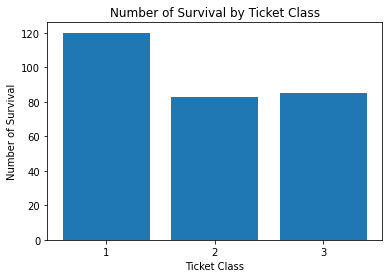

In [71]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(ticket_class_survived.index, ticket_class_survived["Survived"])
plt.xticks([1, 2, 3])
plt.xlabel("Ticket Class")
plt.ylabel("Number of Survival")
plt.title("Number of Survival by Ticket Class")

plt.show()

2. Distribution of age
* It appears that the distribution of age of the survived and deceased group is similar. Thus, age group might not be a factor for survivability

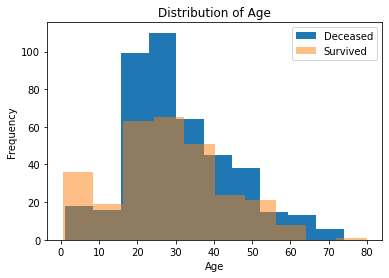

In [97]:
plt.figure()
plt.hist(died["Age"], label="Deceased")
plt.hist(survived["Age"], alpha=0.5, label="Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.legend()
plt.show()

### Hypothesis Testing
##### Hypothesis 1: Whether the mean age of survived passengers was higher than those who did not survive
1. State the null and alternative hypothesis
* $H_0$: $\mu_{survived} \leq \mu_{died}$
* $H_1$: $\mu_{survived} > \mu_{died}$

2. Select the significance level
* I choose the level of significance to be 0.01
* $\alpha$ = 0.01

3. Select the appropriate test statistic
$$t = \frac {\overline {X_{survived}} - \overline {X_{died}}}{\sqrt {s_p^2 (\frac {1}{n_{survived}} + \frac {1}{n_{died}})}}$$

$$\text {where } s_p^2 = \frac{(n_{survived} - 1)s_{survived}^2 + (n_{died} - 1)s_{died}^2}{n_{survived} + n_{died} - 2}$$ 

* $t = \text {t-score}$
* $\overline{X} = \text {Sample mean}$
* $s_p^2 = \text {Pooled variance}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

4. Formulate decision rule
* $df = n_{survived} + n_{died} - 2 = 290 + 424 - 2 = 712$
* Critical value: $t_{critical} = 2.3321$
* Since $H_1$: $\mu_{survived} > \mu_{died}$, we are dealing with right-tailed test. The decision rule is as follow:
    * If $t_{computed} > 2.3321$, then *Reject $H_0$*
    * If $t_{computed} \leq 2.3321$, then *Do no reject $H_0$*

5. Make the decision
* Compute $t_{computed}$ and $p_{value}$


In [73]:
from scipy import stats
t_computed, pval = stats.ttest_ind(survived["Age"], died["Age"])
print("t_computed is:", t_computed)
print("p_value is:", pval / 2)

alpha = 0.01
t_critical = 2.3321
if (pval / 2) < alpha and t_computed > t_critical:
    print("Reject H0")
elif (pval / 2) > alpha and t_computed <= t_critical:
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: -2.2043427748445956
p_value is: 0.013910158125425643
Do not reject H0


* Write a conclusion
    * So, at the 0.01 level of significance, we conclude that the mean age of survived passengers is not higher than those who did not survive

##### Hypothesis 2: Whether the mean ticket fare of survived passengers is higher than those who did not survive
1. State the null and alternative hypothesis
* $H_0$: $\mu_{survived} \leq \mu_{died}$
* $H_1$: $\mu_{survived} > \mu_{died}$

2. Select the significance level
* I choose the level of significance to be 0.01
* $\alpha$ = 0.01

3. Select the appropriate test statistic
$$t = \frac {\overline {X_{survived}} - \overline {X_{died}}}{\sqrt {s_p^2 (\frac {1}{n_{survived}} + \frac {1}{n_{died}})}}$$

$$\text {where } s_p^2 = \frac{(n_{survived} - 1)s_{survived}^2 + (n_{died} - 1)s_{died}^2}{n_{survived} + n_{died} - 2}$$ 

* $t = \text {t-score}$
* $\overline{X} = \text {Sample mean}$
* $s_p^2 = \text {Pooled variance}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

4. Formulate decision rule
* $df = n_{survived} + n_{died} - 2 = 290 + 424 - 2 = 712$
* Critical value: $t_{critical} = 2.3321$
* Since $H_1$: $\mu_{survived} > \mu_{died}$, we are dealing with right-tailed test. The decision rule is as follow:
    * If $t_{computed} > 2.3321$, then *Reject $H_0$*
    * If $t_{computed} \leq 2.3321$, then *Do no reject $H_0$*

5. Make the decision
* Compute $t_{computed}$ and $p_{value}$

In [74]:
t_computed, pval = stats.ttest_ind(survived["Fare"], died["Fare"])
print("t_computed is:", t_computed)
print("p_value is:", pval / 2)

alpha = 0.01
t_critical = 2.3321
if (pval / 2) < alpha and t_computed > t_critical:
    print("Reject H0")
elif (pval / 2) > alpha and t_computed <= t_critical:
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: 7.355647335343511
p_value is: 2.628397890341709e-13
Reject H0


### Sci-Kit Learn Decision Tree Machine Learning Model

##### Hypothesis and Tree Output comparing
* Hypothesis 1: The higher the class is, the better the survival chance. This hypothesis is corroborated since one of the deicison tree nodes at level 1 suggests that if `Pclass` <= 2.5 then you have a better chance to survive
* Hypothesis 2: The higher the passenger's age is, the better chance they will survive. This turns out to be true when a deicison tree node at level 1 suggests that if `Age` <= 6.5 then you are likely to die
* Hypothesis 3: The higher the ticket fare one pays, the better chance they will survive. This is also corroborated since there is a decision treen node at level 2 suggests if your `Fare` <= 20.8 then there is a high chance you will die

Also, it is worth noting that `Sex` turns out to be the most correlated attribute, yet I did not think about it was the one when I came up with the hypothesis. This can be explained as the time of evacuation, lifeboats were prioritized for women and children.

[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.482\nsamples = 712\nvalue = [424, 288]\nclass = died'),
 Text(0.25, 0.625, 'Pclass <= 2.5\ngini = 0.372\nsamples = 259\nvalue = [64, 195]\nclass = survived'),
 Text(0.125, 0.375, 'Age <= 2.5\ngini = 0.108\nsamples = 157\nvalue = [9, 148]\nclass = survived'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = died'),
 Text(0.1875, 0.125, 'gini = 0.098\nsamples = 155\nvalue = [8, 147]\nclass = survived'),
 Text(0.375, 0.375, 'Fare <= 20.8\ngini = 0.497\nsamples = 102\nvalue = [55, 47]\nclass = died'),
 Text(0.3125, 0.125, 'gini = 0.494\nsamples = 79\nvalue = [35, 44]\nclass = survived'),
 Text(0.4375, 0.125, 'gini = 0.227\nsamples = 23\nvalue = [20, 3]\nclass = died'),
 Text(0.75, 0.625, 'Age <= 6.5\ngini = 0.326\nsamples = 453\nvalue = [360, 93]\nclass = died'),
 Text(0.625, 0.375, 'SibSp <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]\nclass = survived'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]\ncla

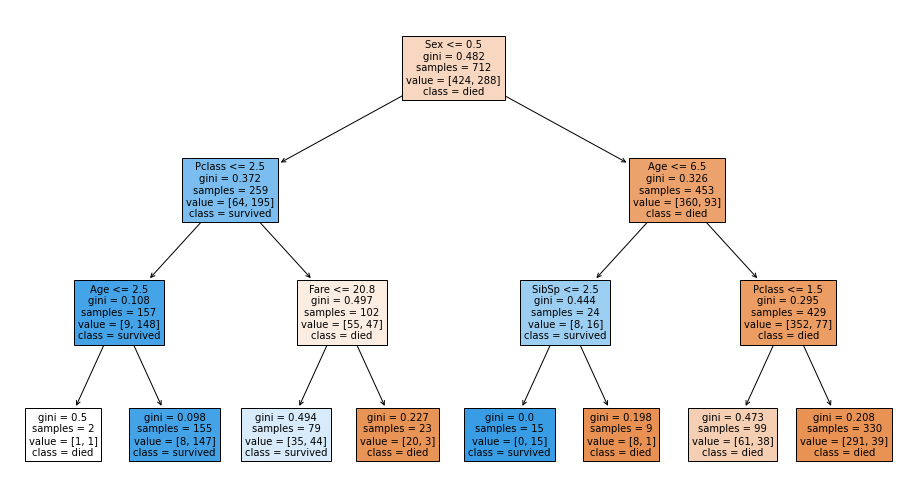

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X_train = df.drop("Survived", axis=1)
y_train = df["Survived"]
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(16, 9))
plot_tree(tree_clf, feature_names=X_train.columns, class_names={1: "survived", 0: "died"}, filled=True, fontsize=10)

### Build/Refine Machine Learning Model
##### Scaling using `MinMaxScaler`

In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normailized = scaler.transform(X_train)
print(X_train_normailized)

[[1.         1.         0.27117366 ... 0.         0.01415106 1.        ]
 [0.         0.         0.4722292  ... 0.         0.13913574 0.        ]
 [1.         0.         0.32143755 ... 0.         0.01546857 1.        ]
 ...
 [0.         0.         0.23347575 ... 0.         0.0585561  1.        ]
 [0.         1.         0.32143755 ... 0.         0.0585561  0.        ]
 [1.         1.         0.39683338 ... 0.         0.01512699 0.5       ]]


##### Check accuracy of a `KNeighborsClassifier` classifier using holdout method
1. Using `train_test_split()`

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=0, stratify=y_train)

In [78]:
print("X_train")
print(X_train)
print("y_train")
print(y_train)

X_train
             Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
PassengerId                                                     
551               1    1  17.0      0      2  110.8833         0
549               3    1  33.0      1      1   20.5250         2
143               3    0  24.0      1      0   15.8500         2
222               2    1  27.0      0      0   13.0000         2
12                1    0  58.0      0      0   26.5500         2
...             ...  ...   ...    ...    ...       ...       ...
611               3    0  39.0      1      5   31.2750         2
84                1    1  28.0      0      0   47.1000         2
245               3    1  30.0      0      0    7.2250         0
809               2    1  39.0      0      0   13.0000         2
192               2    1  19.0      0      0   13.0000         2

[534 rows x 7 columns]
y_train
PassengerId
551    1
549    0
143    1
222    0
12     1
      ..
611    0
84     0
245    0
809    0
192    0
Name

In [79]:
print("X_test")
print(X_test)
print("y_test")
print(y_test)

X_test
             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
231               1    0  35.0      1      0  83.4750         2
373               3    1  19.0      0      0   8.0500         2
9                 3    0  27.0      0      2  11.1333         2
706               2    1  39.0      0      0  26.0000         2
765               3    1  16.0      0      0   7.7750         2
...             ...  ...   ...    ...    ...      ...       ...
428               2    0  19.0      0      0  26.0000         2
334               3    1  16.0      2      0  18.0000         2
799               3    1  30.0      0      0   7.2292         0
861               3    1  41.0      2      0  14.1083         2
625               3    1  21.0      0      0  16.1000         2

[178 rows x 7 columns]
y_test
PassengerId
231    1
373    0
9      1
706    0
765    0
      ..
428    1
334    0
799    0
861    0
625    0
Name: Survived, Len

2. Train and Test the model

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_test = 0
position = 0
for i in range(len(y_test)):
    knn_clf = KNeighborsClassifier(n_neighbors=i + 1)
    knn_clf.fit(X_train, y_train)
    y_pred = knn_clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > acc_test:
        acc_test = acc
        position = i
print("Best accuracy:", acc_test, "position:", position)

Best accuracy: 0.7584269662921348 position: 22


3. Conclusion
* So the best possible accuracy that `kNN` method can achieve is at k neighbor 23 with accuracy of 0.7584

##### Compare with a `DecisionTreeClassifier` model
1. Train and test the model

In [81]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
acc = tree_clf.score(X_test, y_test)
print("Accuracy:", acc)

Accuracy: 0.7921348314606742


2. Conclusion
* The accuracy that the `DecisionTreeClassifier` produces is 0.7921

##### `kNN` and `DecisionTreeClassifier` Comparision
* With this dataset, the accuracy using `DecisionTreeClassifier` is higher than the one produced by `KNN` method by 0.337